### Notes and References
None yet.




## Setup

### Imports for hosted runtime

In [9]:
%matplotlib inline
#@markdown ###First Cell 
#@markdown *Please paste this cell into any colab notebook for this project.* <br>
#@markdown ***
#@markdown **Contents**: Contents. <br>
#@markdown ***
#@markdown Major Edit History: 
#@markdown - John McCloskey, 7/6: Created as copy of Old Notebook (`Grid Searches`).
#@markdown ***
#@markdown <br> 
#@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Change working directory
import os
FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
INCLUDE_DIR = '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils' #@param (type:"string")
PROJECT_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill')
JUPYTER_DIR = os.path.join(PROJECT_DIR,'Colab')
os.chdir(JUPYTER_DIR)
print(f'---\nCWD: {os.getcwd()}')

#@markdown Change pandas `max_rows` and `max_columns`
import pandas as pd
pd.options.display.max_columns = 100 #@param {type:"integer"}
#pd.options.display.max_columns = 1000
pd.options.display.max_rows = 60 #@param {type:"integer"}

#@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# import utils
import sys
sys.path.append(INCLUDE_DIR)
#sys.path.append('.')
import utils

Mounted at /content/drive
---
CWD: /content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab


In [10]:
# jupyter-specific libraries
import ipywidgets as widgets
from google.colab import files
# standard libraries
import numpy as np
import pandas as pd
from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter
from io import BytesIO
from zipfile import ZipFile
import importlib
import urllib.request
# custom libraries
import jowilder_utils as jw_util
import feature_utils as feat_util
# machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as sklearn_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from xgboost import XGBClassifier
import copy
import seaborn as sns

importlib.reload(feat_util)
importlib.reload(jw_util)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


<module 'jowilder_utils' from '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils/jowilder_utils.py'>

### Imports for local runtime

Set INCLUDE_DIR for the OGDUtils modules

In [ ]:
INCLUDE_DIR = r"C:\Users\johnm\Development\FieldDay\OGDUtils" ## CHANGE THIS

In [ ]:
# specific to local john computer
import sys
sys.path.append(INCLUDE_DIR)

# standard libraries
import numpy as np
import pandas as pd
import os

from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter
from io import BytesIO
from zipfile import ZipFile
import importlib
import urllib.request
# custom libraries
import jowilder_utils as jw_util
import feature_utils as feat_util
# machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as sklearn_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from xgboost import XGBClassifier
from sklearn.preprocessing import KBinsDiscretizer

import copy

importlib.reload(feat_util)
importlib.reload(jw_util)

<module 'jowilder_utils' from 'C:\\Users\\johnm\\Development\\FieldDay\\OGDUtils\\jowilder_utils.py'>

## Model Inspection

In [11]:
print(os.getcwd())

/content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab


In [12]:
# John Local
csv_path = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202007061150_fullThroughJune_withUnreached_obj-_thresh0_0.csv"
# hosted
csv_path = r"Output Data/JM_202007061150_fullThroughJune_withUnreached_obj-_thresh0_0.csv"
df, meta = feat_util.open_csv_from_path_with_meta(csv_path)

In [13]:
WS = jw_util.JWWindowSelector(df=df, meta=meta)

In [ ]:
# model_name = 'withUnreached_onlyNonnative_obj76-thresh1_y2_bin_0v123_C0-02_LogisticRegressionCV_auc_l2_RandomOverSampler_y2_bin_0v123'
model_name = 'withUnreached_obj43-thresh10_y1_bin_0v12_customC_LogisticRegressionCV_auc_l2_RandomOverSampler_y1_bin_0v12'
# model_name = 'withUnreached_obj43-thresh10_y1_bin_0v12_customC_LogisticRegressionCV_auc_l1_RandomOverSampler_y1_bin_0v12'
model, X, y = feat_util.load_model(f'Output Models/{model_name}.sav')

In [ ]:
Xraw = df.loc[X.index, :]
logreg = model[-1]
print(logreg)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring='f1', solver='saga',
                     tol=0.001, verbose=0)


In [ ]:
# coef_df = pd.DataFrame(logreg.coef_.ravel(), columns=X.columns)

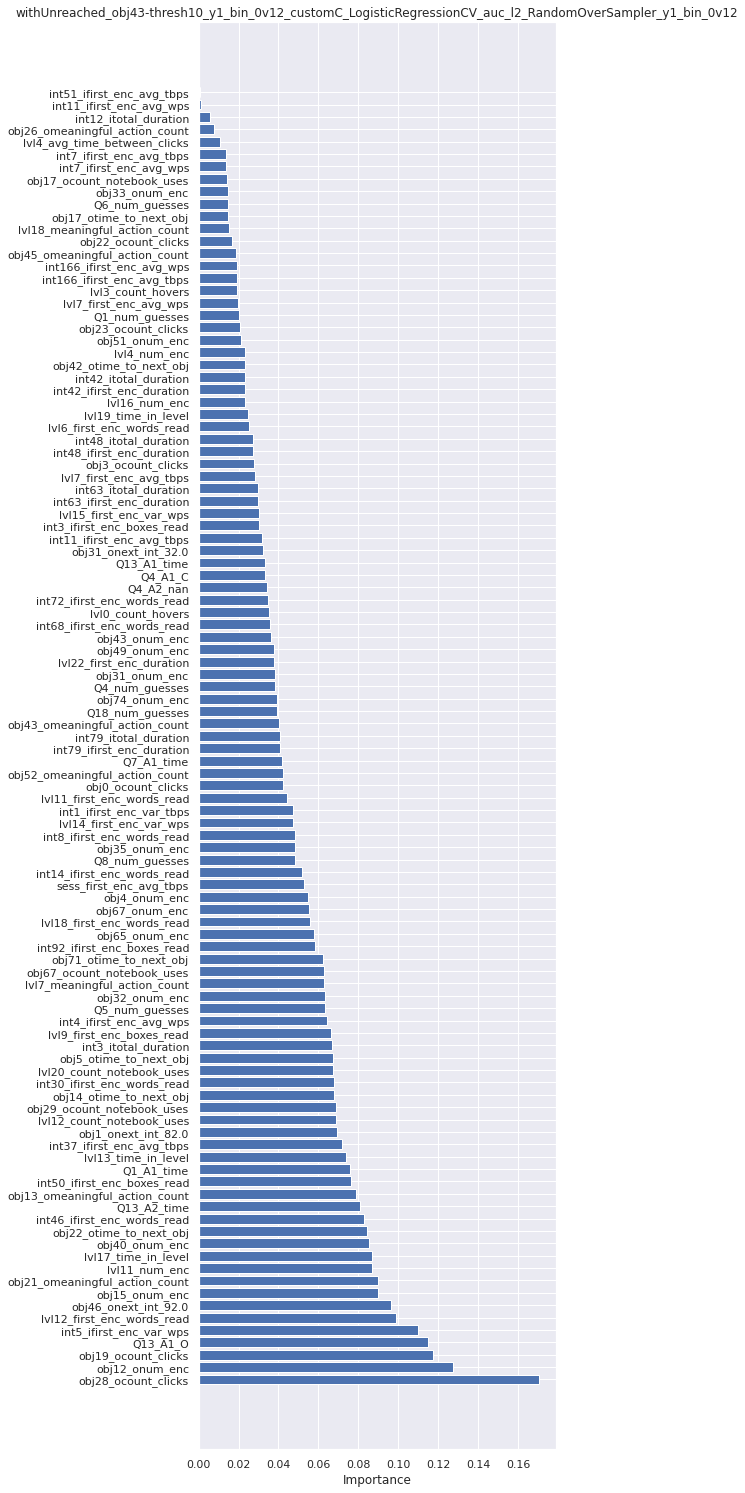

In [ ]:
CHART_SIZE_FACTOR = 10 
def FeatureSuggestionPlot(features, importances, title):
  fig = plt.figure(figsize=[6.4, len(importances)*(CHART_SIZE_FACTOR/10)/4])
  ax = fig.subplots()
  y_pos = np.arange(len(features))
  ax.barh(y_pos, importances, align='center')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(features)
  ax.set_xlabel("Importance")
  ax.set_title(title)
  fig.show()
# [(x,y),(x,y)]
# [x,x],[y,y]
cols, coefs = zip(*list(sorted(zip(X.columns, np.abs(logreg.coef_.ravel())), key=lambda x:x[1], reverse=True)))
FeatureSuggestionPlot(cols, coefs, title=model_name)

In [ ]:
import re
from collections import defaultdict

def group_tuples(l):
    d = defaultdict(lambda: [])
    for k,v in l:
        d[k].append(v)
    return d


def split_text_int(string):
    match = re.match(r"([a-zA-Z]+)([0-9]+)", string, re.I)

    if match:
        items = match.groups()
    else:
        print(f'No match for {string}!')
        assert False
    assert len(items) == 2
    return items[0], int(items[1])

def parse_window(feat):
    prefix = feat.split('_')[0]
    suffix = feat[len(prefix)+1:]
    if prefix == 'sess':
        return 'sess', None, None
    window_abbrev, window_n = split_text_int(prefix)
    return window_abbrev, window_n, suffix
parsed_cols = [parse_window(c) for c in cols]

In [ ]:
print(*group_tuples(parsed_cols).items(), sep='\n')

ValueError: ignored

In [ ]:
import json
import urllib.request
github_jowilder_info_path = r'https://raw.githubusercontent.com/fielddaylab/opengamedata/master/game_info/Jowilder'
github_jowilder_enum_path = os.path.join(github_jowilder_info_path,'jo_wilder_fqid_to_enum.json')
def load_url_json(url_path):
    with urllib.request.urlopen(url_path) as url:
        data = json.loads(url.read().decode())
        return data
fqid_to_enum = load_url_json(github_jowilder_enum_path)

In [ ]:
enum_to_fqid = {v:k for k,v in fqid_to_enum.items()}

In [ ]:
for i in range(len(parsed_cols)):
    wintype, winn, suffix = parsed_cols[i]
    print(f'{wintype} {winn}:')
    if wintype in ['obj', 'int']:
        print(f'{wintype} {winn}: {enum_to_fqid[winn]}')
    else:
        print(wintype, winn, suffix)

obj 28: tunic.historicalsociety.frontdesk.archivist.newspaper
obj 12: tunic.historicalsociety.closet_dirty.what_happened
obj 19: tunic.humanecology.frontdesk.worker.intro
Q 13 A1_O
int 5: tunic.historicalsociety.collection.gramps.found
lvl 12 first_enc_words_read
obj 46: tunic.historicalsociety.cage.glasses.afterteddy
obj 15: tunic.historicalsociety.closet_dirty.gramps.news
obj 21: tunic.drycleaner.frontdesk.worker.hub
lvl 11 num_enc
lvl 17 time_in_level
obj 40: tunic.capitol_1.hall.gramps.chap2_teddy_finale_2
obj 22: tunic.drycleaner.frontdesk.logbook.page.bingo
int 46: tunic.historicalsociety.cage.glasses.afterteddy
Q 13 A2_time
obj 13: tunic.historicalsociety.closet_dirty.trigger_scarf
int 50: tunic.historicalsociety.basement.savedteddy
Q 1 A1_time
lvl 13 time_in_level
int 37: tunic.capitol_1.hall.boss.chap2_finale_6
obj 1: tunic.historicalsociety.closet.teddy.intro_0_cs_0
lvl 12 count_notebook_uses
obj 29: tunic.historicalsociety.stacks.journals.pic_2.bingo
obj 14: tunic.historical

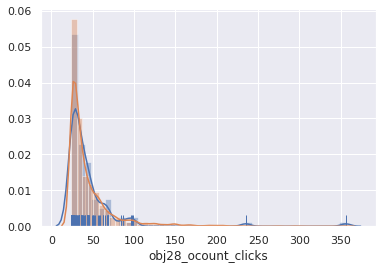

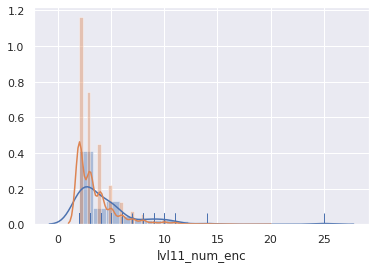

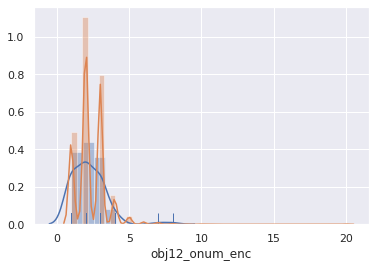

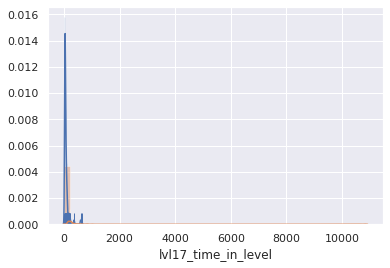

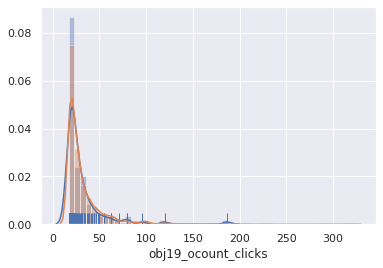

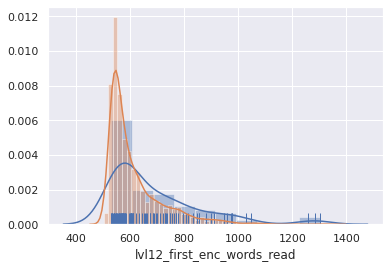

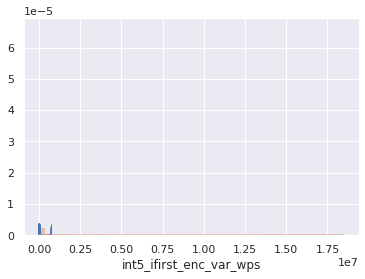

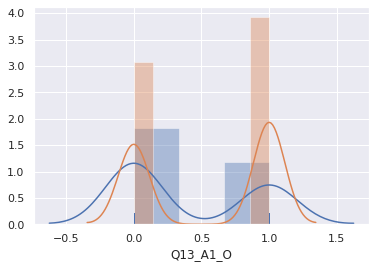

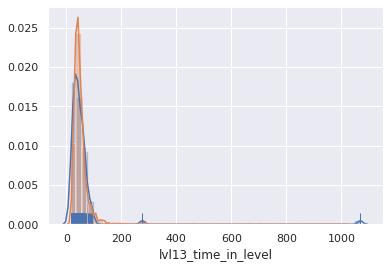

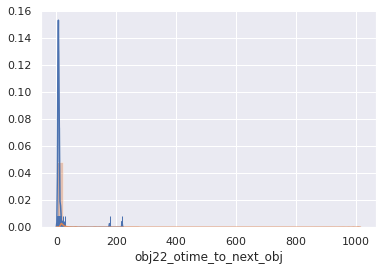

In [ ]:
# interested in notebook cts for o22, o47, o62, o18
# sampler =  RandomUnderSampler(random_state=1,)
# sampled_X, _ = sampler.fit_sample(X,Y[sampling_label])
# sampled_X = X.iloc[sampler.sample_indices_,:]
# sampled_Y = Y.iloc[sampler.sample_indices_,:]
# XY = WS.join_XY(X, Y)
# log_XY = WS.join_XY(np.log1p(X),Y)
# sampled_XY = WS.join_XY(sampled_X, sampled_Y)
# log_sampled_XY = WS.join_XY(np.log1p(sampled_X),sampled_Y)

logXraw = np.log1p(Xraw)
high_cols = cols[:10]
# cols = [f'obj{n}_ocount_notebook_uses' for n in [18,22,47,62]]+['sess_end_obj']
tdf0 = Xraw.loc[y==0, high_cols]
tdf1 = Xraw.loc[y==1, high_cols]
tdf = Xraw.loc[:,high_cols]
tdf['R2'] = y
# sns.pairplot(tdf, hue='R2')

for n in range(len(high_cols)):
    sns.distplot(tdf0.iloc[:,n], rug=True)
    sns.distplot(tdf1.iloc[:,n])
    plt.show()

In [ ]:
display(tdf0.describe())
display(tdf1.describe())

,obj28_ocount_clicks,obj12_onum_enc,int5_ifirst_enc_var_wps,obj19_ocount_clicks,Q13_A1_O,obj46_onext_int_92.0,lvl20_count_notebook_uses,obj21_omeaningful_action_count,obj13_omeaningful_action_count,obj15_onum_enc
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,64.000000,97.000000,97.000000,97.000000
mean,45.268041,2.216495,9858.675904,31.329897,0.391753,0.381443,0.859375,1.288660,1.628866,2.030928
std,41.378969,1.192221,73802.745497,23.846611,0.490678,0.488264,1.499917,0.611671,1.277364,1.103532
min,24.000000,1.000000,12.051822,17.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,27.000000,1.000000,132.572320,19.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,34.000000,2.000000,269.206691,23.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,46.000000,3.000000,1120.789184,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,356.000000,8.000000,724466.662917,187.000000,1.000000,1.000000,8.000000,4.000000,7.000000,8.000000


,obj28_ocount_clicks,obj12_onum_enc,int5_ifirst_enc_var_wps,obj19_ocount_clicks,Q13_A1_O,obj46_onext_int_92.0,lvl20_count_notebook_uses,obj21_omeaningful_action_count,obj13_omeaningful_action_count,obj15_onum_enc
count,2006.000000,2006.000000,2.006000e+03,2006.000000,2006.000000,2006.000000,1464.000000,2006.000000,2006.000000,2006.000000
mean,45.103689,2.350449,1.513689e+05,32.326022,0.560319,0.634098,0.512295,1.161017,1.424227,1.799103
std,30.822737,1.100133,1.285601e+06,23.422657,0.496472,0.481802,0.964786,0.528014,1.156567,1.030226
min,24.000000,1.000000,6.670840e+00,17.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,28.000000,2.000000,1.482721e+02,19.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,34.000000,2.000000,4.207520e+02,24.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
75%,50.000000,3.000000,2.458524e+03,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,355.000000,20.000000,1.845808e+07,321.000000,1.000000,1.000000,13.000000,11.000000,17.000000,11.000000


In [ ]:
# with open(f'Output Models/{model_name}_meta.txt') as f:
    # print(f.read())

In [ ]:
tdf.groupby(['sess_end_obj','R2']).count()

KeyError: ignored

In [ ]:
WS.

## Visualization of June Windows

In [15]:
window_type = WS.OBJECTIVE
window_n = 4

In [16]:
sampling_label = 'R1_quiz_response'

In [18]:
[c for c in df.columns if 'otime_to_next_obj' in c]

['obj0_otime_to_next_obj',
 'obj10_otime_to_next_obj',
 'obj11_otime_to_next_obj',
 'obj12_otime_to_next_obj',
 'obj13_otime_to_next_obj',
 'obj14_otime_to_next_obj',
 'obj15_otime_to_next_obj',
 'obj16_otime_to_next_obj',
 'obj17_otime_to_next_obj',
 'obj18_otime_to_next_obj',
 'obj19_otime_to_next_obj',
 'obj1_otime_to_next_obj',
 'obj20_otime_to_next_obj',
 'obj21_otime_to_next_obj',
 'obj22_otime_to_next_obj',
 'obj23_otime_to_next_obj',
 'obj24_otime_to_next_obj',
 'obj25_otime_to_next_obj',
 'obj26_otime_to_next_obj',
 'obj27_otime_to_next_obj',
 'obj28_otime_to_next_obj',
 'obj29_otime_to_next_obj',
 'obj2_otime_to_next_obj',
 'obj30_otime_to_next_obj',
 'obj31_otime_to_next_obj',
 'obj32_otime_to_next_obj',
 'obj33_otime_to_next_obj',
 'obj34_otime_to_next_obj',
 'obj35_otime_to_next_obj',
 'obj36_otime_to_next_obj',
 'obj37_otime_to_next_obj',
 'obj38_otime_to_next_obj',
 'obj39_otime_to_next_obj',
 'obj3_otime_to_next_obj',
 'obj40_otime_to_next_obj',
 'obj41_otime_to_next_ob

In [19]:
tdf = df.query(f'sess_start_obj == 0 & sess_end_obj > 76 & sessDuration > 0 & sessDuration < {2*60*60}')
tdf['sessDuration'].describe().astype(int)

count    6708
mean     2602
std      1101
min       692
25%      1847
50%      2332
75%      3038
max      7175
Name: sessDuration, dtype: int64

In [ ]:
important_ints = list(sorted(list(set([5, 46, 50, 37, 30, 3, 4, 92, 14, 8, 1, 79, 79, 68, 72, 11, 3, 63, 63, 48, 48, 42, 42, 166, 166, 7, 7, 12, 11, 51]+
                                      [28, 12, 19, 46, 15, 21, 40, 22, 13, 1, 29, 14, 5, 32, 67, 71, 65, 67, 4, 35, 0, 52, 43, 74, 31, 49, 43, 31, 3, 42, 51, 23, 45, 22, 17, 33, 17, 26]))))
important_ints = [5, 46, 50, 37, 30, 3, 4, 92, 14, 8, 1, 79, 79, 68, 72, 11, 3, 63, 63, 48, 48, 42, 42, 166, 166, 7, 7, 12, 11, 51]
important_ints = [28, 12, 19, 46, 15, 21, 40, 22, 13, 1, 29, 14, 5, 32, 67, 71, 65, 67, 4, 35, 0, 52, 43, 74, 31, 49, 43, 31, 3, 42, 51, 23, 45, 22, 17, 33, 17, 26]
important_int_timetos = [f'int{i}_itime_to' for i in important_ints]
tdf2 = tdf[important_int_timetos+[sampling_label]]
tdf2melt = tdf2.melt(id_vars=[sampling_label], value_vars=important_int_timetos)
tdf2melt['value'] = tdf2melt['value'] / 60
sns.catplot(data=tdf2melt, y='variable', x='value', kind='bar',height=30, aspect=.3)

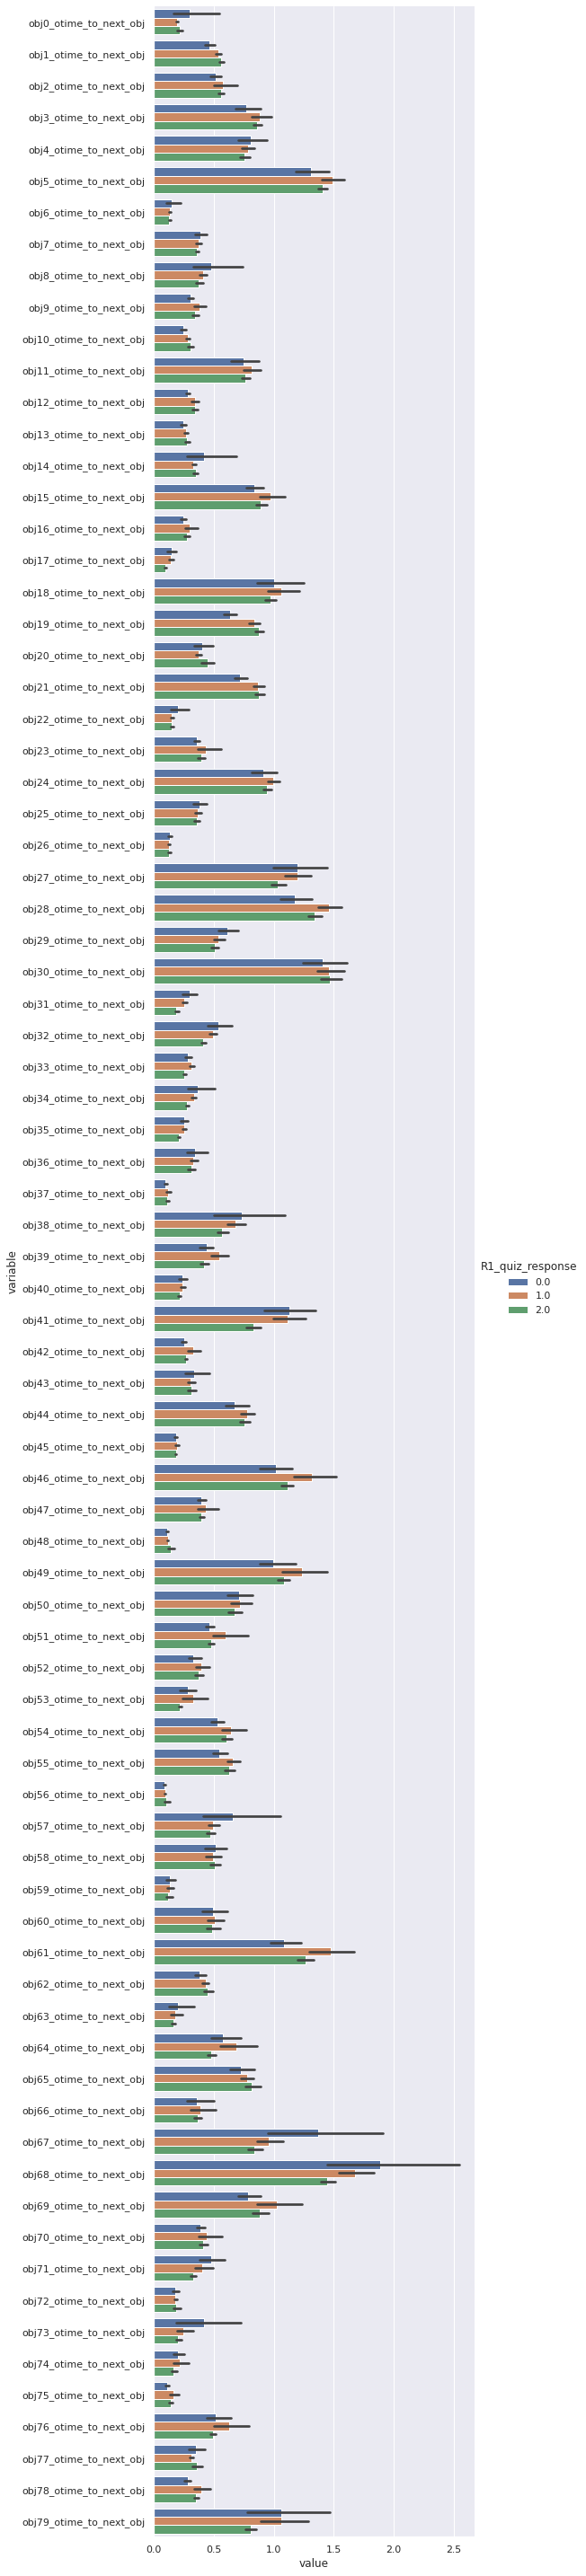

In [26]:
important_ints = list(sorted(list(set([5, 46, 50, 37, 30, 3, 4, 92, 14, 8, 1, 79, 79, 68, 72, 11, 3, 63, 63, 48, 48, 42, 42, 166, 166, 7, 7, 12, 11, 51]+
                                      [28, 12, 19, 46, 15, 21, 40, 22, 13, 1, 29, 14, 5, 32, 67, 71, 65, 67, 4, 35, 0, 52, 43, 74, 31, 49, 43, 31, 3, 42, 51, 23, 45, 22, 17, 33, 17, 26]))))
important_ints = [5, 46, 50, 37, 30, 3, 4, 92, 14, 8, 1, 79, 79, 68, 72, 11, 3, 63, 63, 48, 48, 42, 42, 166, 166, 7, 7, 12, 11, 51]
important_ints = [28, 12, 19, 46, 15, 21, 40, 22, 13, 1, 29, 14, 5, 32, 67, 71, 65, 67, 4, 35, 0, 52, 43, 74, 31, 49, 43, 31, 3, 42, 51, 23, 45, 22, 17, 33, 17, 26]
important_int_timetos = [f'int{i}_itime_to' for i in important_ints]

important_timetos = [f'obj{o}_otime_to_next_obj' for o in range(80)]
tdf2 = tdf[important_timetos+[sampling_label]]
tdf2melt = tdf2.melt(id_vars=[sampling_label], value_vars=important_timetos)
tdf2melt['value'] = tdf2melt['value'] / 60
sns.catplot(data=tdf2melt, y='variable', x='value', hue=sampling_label, kind='bar',height=40, aspect=.2)

In [ ]:
tdf2melt

,R1_quiz_response,variable,value
0,2.0,int1_itime_to,32.571
1,2.0,int1_itime_to,32.172
2,2.0,int1_itime_to,34.865
3,2.0,int1_itime_to,24.432
4,2.0,int1_itime_to,22.141
...,...,...,...
147571,2.0,int166_itime_to,1108.556
147572,2.0,int166_itime_to,631.990
147573,1.0,int166_itime_to,NaN
147574,1.0,int166_itime_to,NaN


In [ ]:
X, Y, meta = WS.get_X_Y_meta(n= window_n, window_type= window_type)
prefix = WS.get_prefix(n= window_n, window_type= window_type)
sampler =  RandomUnderSampler(random_state=1,)
sampled_X, _ = sampler.fit_sample(X,Y[sampling_label])
sampled_X = X.iloc[sampler.sample_indices_,:]
sampled_Y = Y.iloc[sampler.sample_indices_,:]
XY = WS.join_XY(X, Y)
log_XY = WS.join_XY(np.log1p(X),Y)
sampled_XY = WS.join_XY(sampled_X, sampled_Y)
log_sampled_XY = WS.join_XY(np.log1p(sampled_X),sampled_Y)

Query: Intial Shape, output_shape: (46852, 70)
Query: R1_quiz_response == R1_quiz_response, output_shape: (46848, 70)
Query: Q4_A1_nan!=1, output_shape: (14537, 70)
Query: R0_quiz_response == R0_quiz_response, output_shape: (14537, 70)
Query: R1_quiz_response == R1_quiz_response, output_shape: (14537, 70)
Query: R2_quiz_response == R2_quiz_response, output_shape: (14537, 70)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
sampled_XY.groupby(sampling_label).describe()

Q4_A1_time                                              \
                      count       mean        std    min     25%    50%   
R1_quiz_response                                                          
0.0                   827.0  10.294756  91.747867  1.133  3.6375  4.960   
1.0                   827.0   6.886031   6.203326  1.229  3.7690  4.916   
2.0                   827.0   7.322060  44.791739  1.834  3.3850  4.250   

                                   Q4_A2_time                                \
                     75%       max      count      mean       std  min  25%   
R1_quiz_response                                                              
0.0               7.7920  2633.553      827.0  2.444354  4.002435  0.0  0.0   
1.0               7.6875    89.147      827.0  1.605602  3.148159  0.0  0.0   
2.0               5.8000  1228.593      827.0  1.014930  3.401866  0.0  0.0   

                                      Q4_A3_time                           \
                  50%     75%     max      count      mean       std  min   
R1_quiz_response                                                            
0.0               0.0  3.6370  28.708      827.0  1.414596  3.308053  0.0   
1.0               0.0  2.5915  28.023      827.0  0.841554  2.440477  0.0   
2.0               0.0  0.0000  65.802      827.0  0.404094  1.697403  0.0   

                                         Q4_num_guesses                      \
                  25%  50%   75%     max          count      mean       std   
R1_quiz_response                                                              
0.0               0.0  0.0  1.95  34.114          827.0  4.013301  6.087225   
1.0               0.0  0.0  0.00  31.830          827.0  2.956469  4.914577   
2.0               0.0  0.0  0.00  20.517          827.0  1.845224  3.009708   

                                           Q4_A1_A                           \
                  min  25%  50%  75%   max   count      mean       std  min   
R1_quiz_response                                                              
0.0               1.0  1.0  1.0  3.0  50.0   827.0  0.015719  0.124463  0.0   
1.0               1.0  1.0  1.0  2.0  47.0   827.0  0.010883  0.103814  0.0   
2.0               1.0  1.0  1.0  1.0  24.0   827.0  0.003628  0.060156  0.0   

                                     Q4_A1_B                                \
                  25%  50%  75%  max   count      mean       std  min  25%   
R1_quiz_response                                                             
0.0               0.0  0.0  0.0  1.0   827.0  0.099154  0.299049  0.0  0.0   
1.0               0.0  0.0  0.0  1.0   827.0  0.065296  0.247197  0.0  0.0   
2.0               0.0  0.0  0.0  1.0   827.0  0.024184  0.153712  0.0  0.0   

                                Q4_A1_C            ... R1_quiz_response_01v2  \
                  50%  75%  max   count      mean  ...                   75%   
R1_quiz_response                                   ...                         
0.0               0.0  0.0  1.0   827.0  0.553809  ...                   0.0   
1.0               0.0  0.0  1.0   827.0  0.675937  ...                   0.0   
2.0               0.0  0.0  1.0   827.0  0.813785  ...                   1.0   

                      R1_quiz_response_bin_x                                \
                  max                  count mean  std  min  25%  50%  75%   
R1_quiz_response                                                             
0.0               0.0                  827.0  0.0  0.0  0.0  0.0  0.0  0.0   
1.0               0.0                    0.0  NaN  NaN  NaN  NaN  NaN  NaN   
2.0               1.0                  827.0  1.0  0.0  1.0  1.0  1.0  1.0   

                      R2_quiz_response_bin                                     \
                  max                count      mean       std  min  25%  50%   
R1_quiz_response                                                                
0.0             

In [ ]:
X_vars = list(X.columns)
sampled_XY.columns

Index(['Q4_A1_time', 'Q4_A2_time', 'Q4_A3_time', 'Q4_num_guesses', 'Q4_A1_A',
       'Q4_A1_B', 'Q4_A1_C', 'Q4_A1_D', 'Q4_A1_E', 'Q4_A1_F', 'Q4_A1_G',
       'Q4_A1_H', 'Q4_A1_I', 'Q4_A1_J', 'Q4_A1_K', 'Q4_A1_L', 'Q4_A1_M',
       'Q4_A1_N', 'Q4_A1_O', 'Q4_A1_P', 'Q4_A1_Q', 'Q4_A2_A', 'Q4_A2_B',
       'Q4_A2_C', 'Q4_A2_D', 'Q4_A2_E', 'Q4_A2_F', 'Q4_A2_G', 'Q4_A2_H',
       'Q4_A2_I', 'Q4_A2_J', 'Q4_A2_K', 'Q4_A2_L', 'Q4_A2_M', 'Q4_A2_N',
       'Q4_A2_O', 'Q4_A2_P', 'Q4_A2_Q', 'Q4_A2_nan', 'Q4_A3_A', 'Q4_A3_B',
       'Q4_A3_C', 'Q4_A3_D', 'Q4_A3_E', 'Q4_A3_F', 'Q4_A3_G', 'Q4_A3_H',
       'Q4_A3_I', 'Q4_A3_J', 'Q4_A3_K', 'Q4_A3_L', 'Q4_A3_M', 'Q4_A3_N',
       'Q4_A3_O', 'Q4_A3_P', 'Q4_A3_Q', 'Q4_A3_nan', 'R0_quiz_response',
       'R1_quiz_response', 'R2_quiz_response', 'R1_quiz_response_bin',
       'R1_quiz_response_0v12', 'R1_quiz_response_01v2',
       'R1_quiz_response_bin_x', 'R2_quiz_response_bin',
       'R2_quiz_response_bin_x', 'R2_quiz_response_bin0v123',
       'R2_quiz_

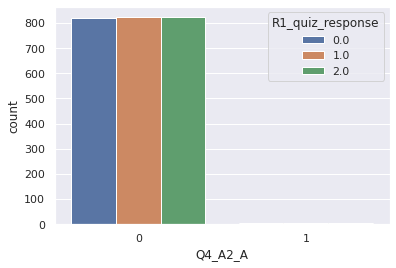

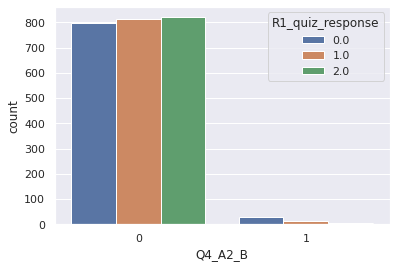

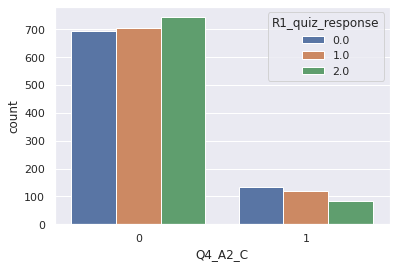

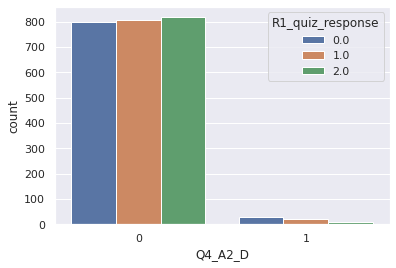

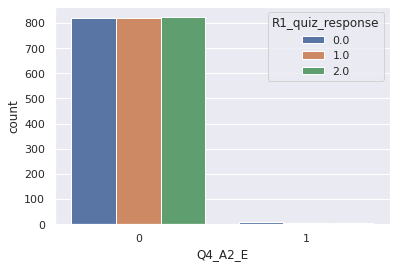

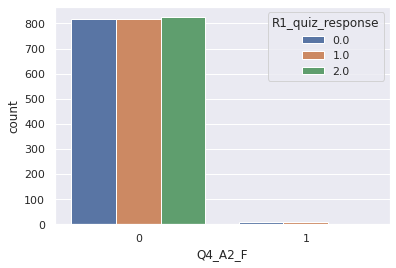

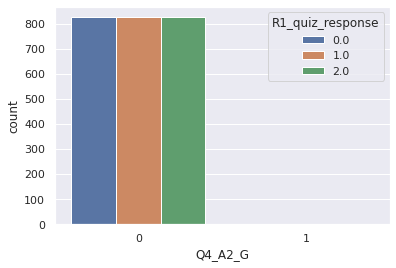

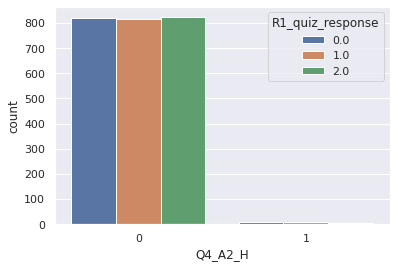

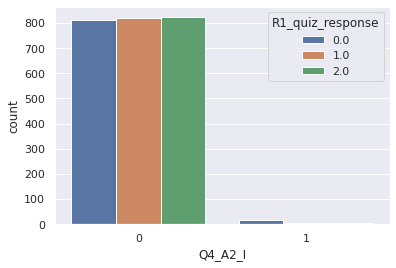

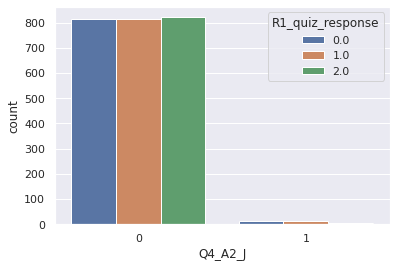

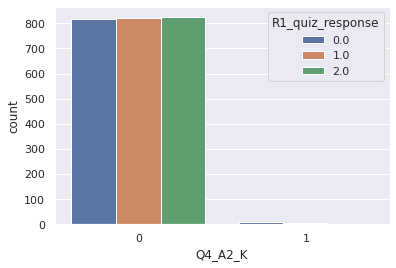

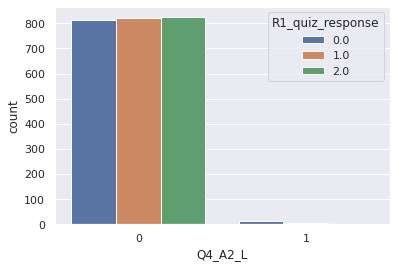

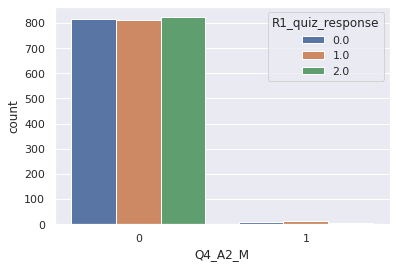

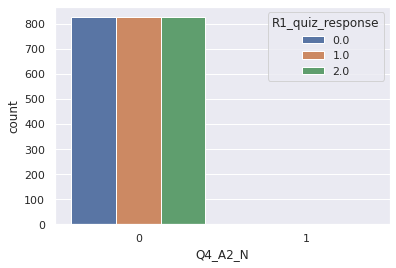

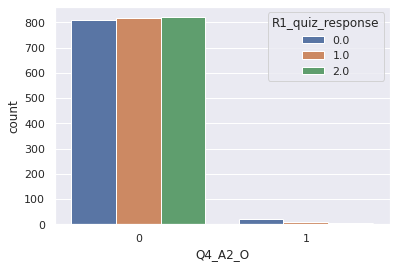

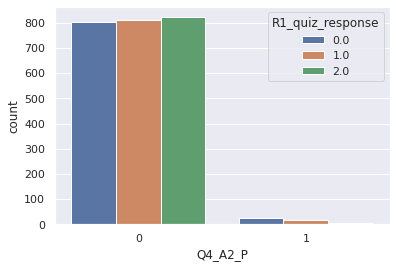

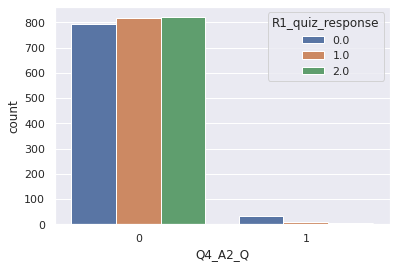

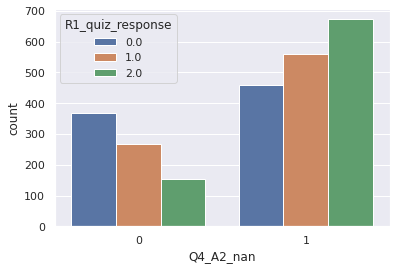

In [ ]:
use_cols = ['Q4_A2_A', 'Q4_A2_B',
       'Q4_A2_C', 'Q4_A2_D', 'Q4_A2_E', 'Q4_A2_F', 'Q4_A2_G', 'Q4_A2_H',
       'Q4_A2_I', 'Q4_A2_J', 'Q4_A2_K', 'Q4_A2_L', 'Q4_A2_M', 'Q4_A2_N',
       'Q4_A2_O', 'Q4_A2_P', 'Q4_A2_Q', 'Q4_A2_nan']
for col in use_cols:
    sns.countplot(data=sampled_XY, hue=sampling_label, x=col)
    plt.show()

In [ ]:
# sns.catplot(data=df, x=sampling_label, y=f'Q4_num_guesses', kind='box')
df.query('Q4_num_guesses==Q4_num_guesses').groupby(sampling_label)['Q4_num_guesses']

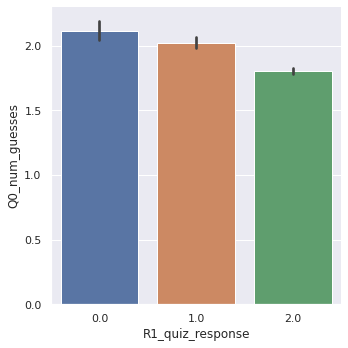

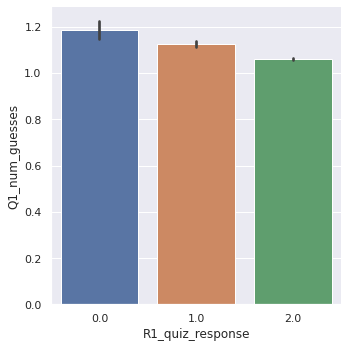

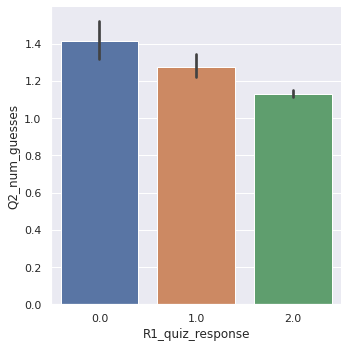

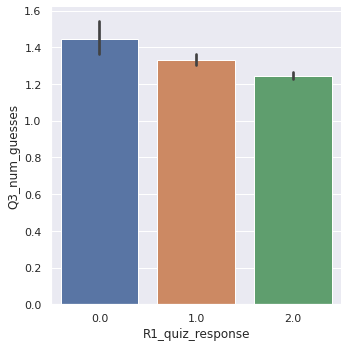

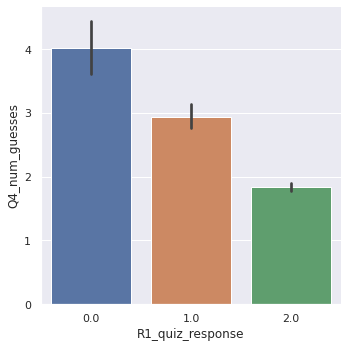

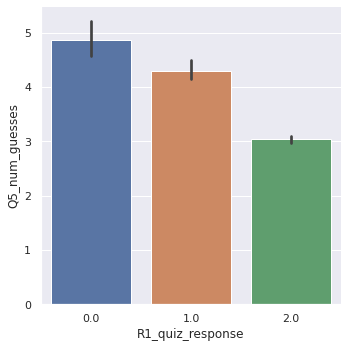

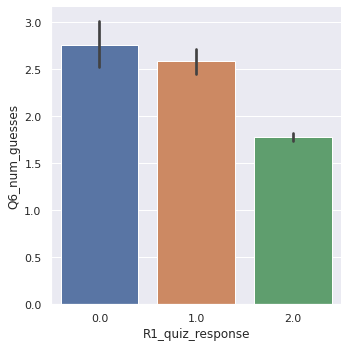

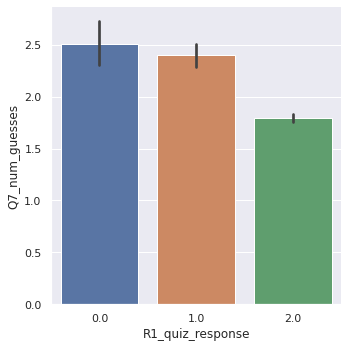

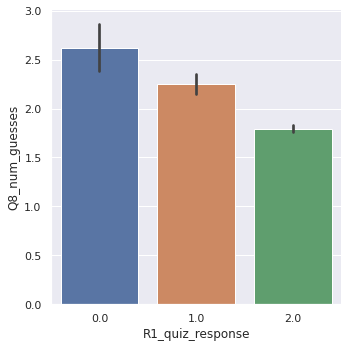

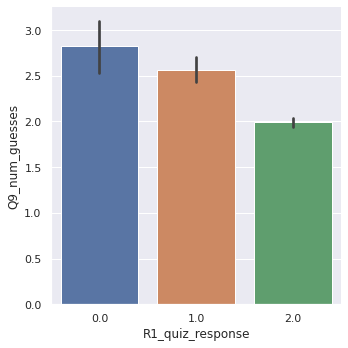

In [ ]:
for q in range(10):
    sns.catplot(data=df, x=sampling_label, y=f'Q{q}_num_guesses', kind='bar')
    plt.show()

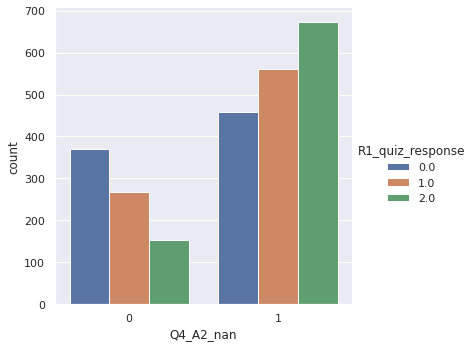

In [ ]:
sns.catplot(data=sampled_XY, hue=sampling_label, x='Q4_A2_nan', kind='count')

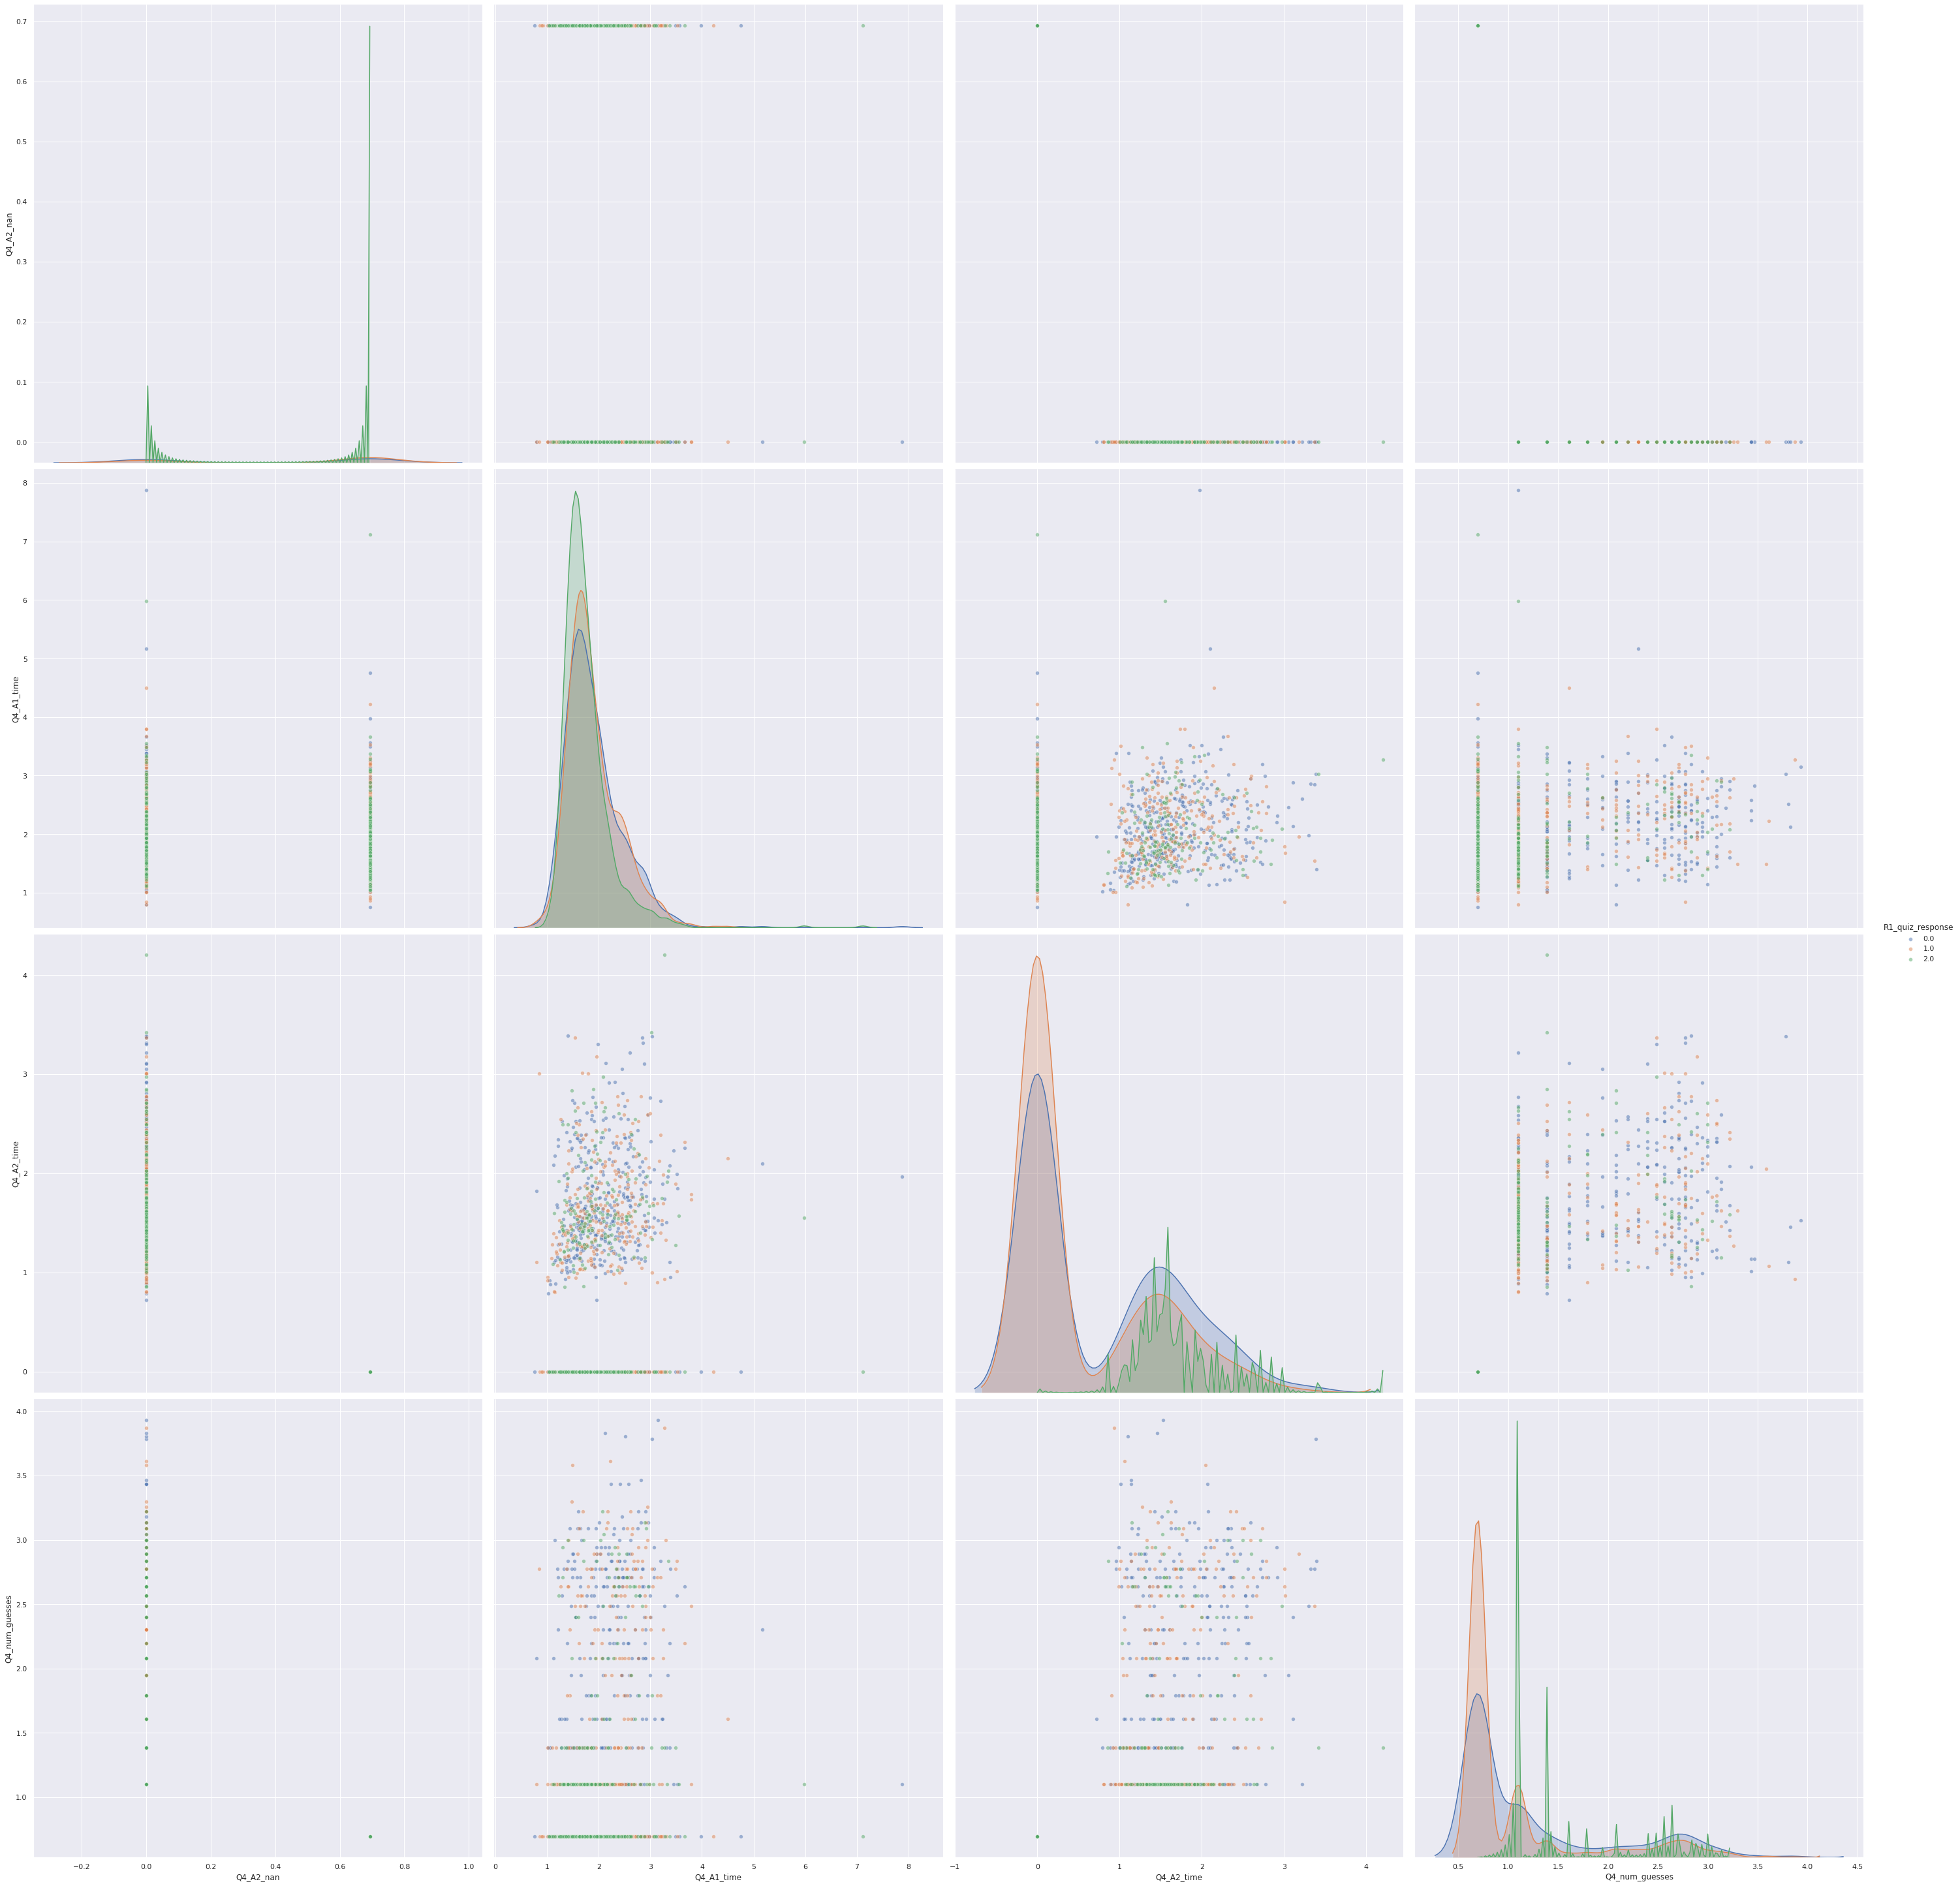

In [ ]:
use_cols = [f'{prefix}{x}' for x in [
                'A2_nan', 'A1_time', 'A2_time', 'num_guesses'
                ]]
sns.pairplot(log_sampled_XY, hue=sampling_label, vars=use_cols, plot_kws={'alpha': .5}, height=10)

In [ ]:
log_sampled_XY['Q4_A2_nan'].describe()

count    2481.000000
mean        0.472435
std         0.322977
min         0.000000
25%         0.000000
50%         0.693147
75%         0.693147
max         0.693147
Name: Q4_A2_nan, dtype: float64

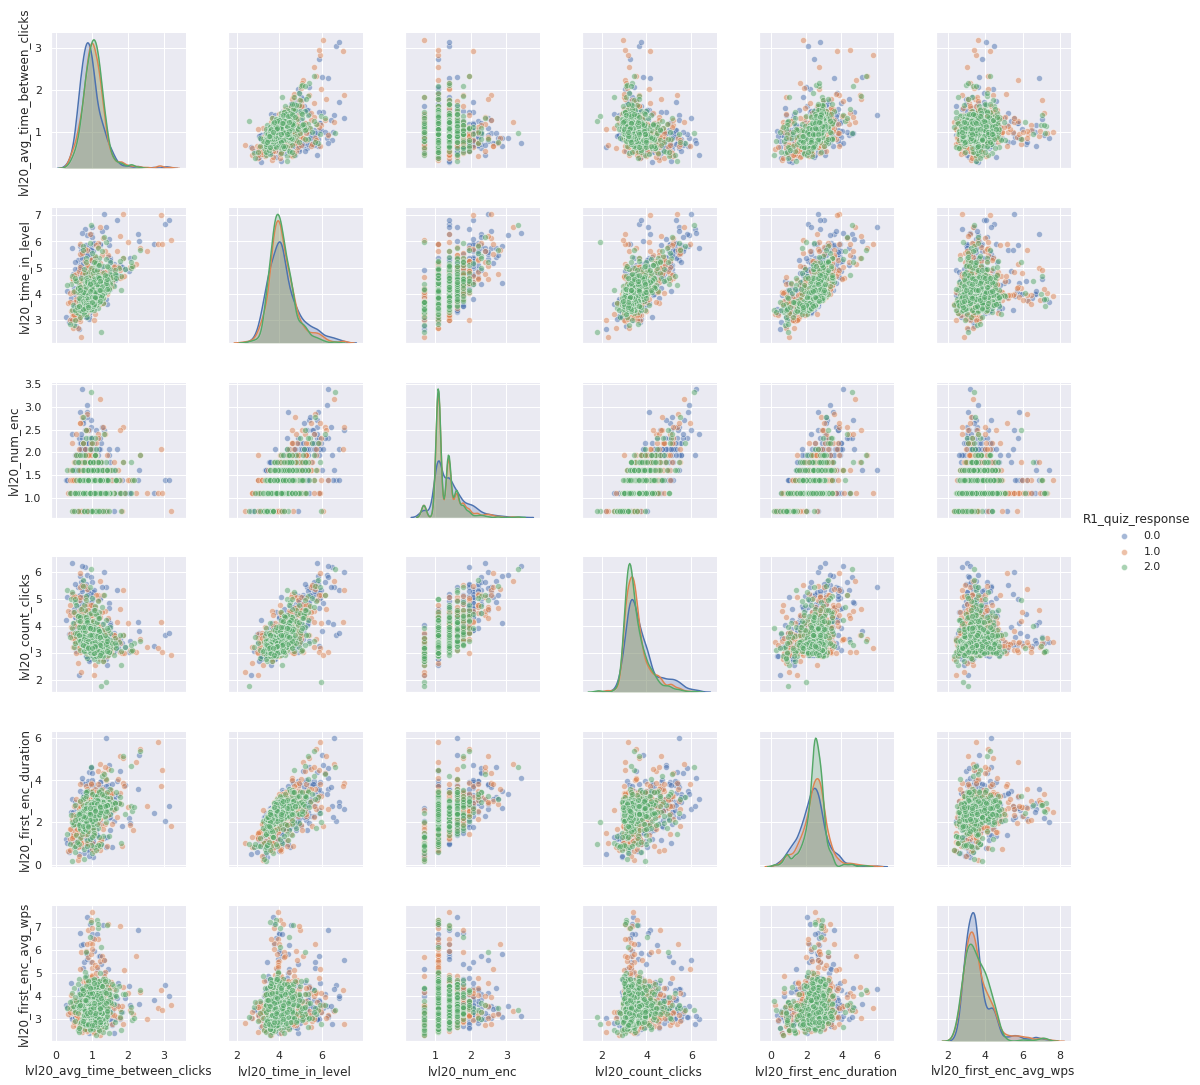

In [ ]:
sns.pairplot(log_sampled_XY, hue='R1_quiz_response', vars=use_cols, plot_kws={'alpha': .5})

In [ ]:
np.log1p(X)

,lvl7_EventCount,lvl7_avg_time_between_clicks,lvl7_count_clicks,lvl7_count_hovers,lvl7_count_notebook_uses,lvl7_first_enc_avg_tbps,lvl7_first_enc_avg_wps,lvl7_first_enc_duration,lvl7_first_enc_var_tbps,lvl7_first_enc_var_wps,lvl7_meaningful_action_count,lvl7_num_enc,lvl7_time_in_level
sessionID,,,,,,,,,,,,,
19110000090781600,4.317488,2.380623,3.931826,3.218876,0.000000,2.404736,4.296495,5.857124,5.897516,10.227291,2.484907,1.945910,6.195631
19110008122038204,3.912023,1.111426,3.496508,2.890372,0.000000,1.514136,3.130995,3.324532,1.934988,5.290816,2.079442,1.386294,4.186194
19110008501053136,4.077537,0.873598,3.637586,3.091042,0.000000,1.398286,3.026645,2.814210,2.957773,6.823858,2.397895,1.609438,3.951897
19110009114094480,4.043051,1.049706,3.637586,2.995732,0.000000,1.925131,3.199613,3.232384,4.922449,6.399014,2.197225,1.609438,4.226600
19110009240104090,4.615121,0.782110,4.615121,0.000000,0.693147,2.094344,4.145179,3.181838,5.485610,10.117340,2.079442,1.098612,4.776650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20050621043538660,4.110874,0.936248,3.784190,2.890372,1.098612,1.208029,2.794714,3.167835,1.716113,5.431085,2.197225,1.609438,4.206944
20050621060100704,4.219508,0.521564,3.931826,2.890372,0.693147,1.386717,3.019010,2.451781,0.880279,4.948537,2.302585,1.609438,3.543854
20050622050615504,4.454347,1.086870,3.912023,3.610918,0.000000,1.487834,3.214765,3.139746,2.819952,7.325479,2.639057,1.791759,4.569543


In [ ]:
logX = X.transform(np.log1p)

## Statsmodel

In [ ]:
os.getcwd()

'/content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab'

In [ ]:
model_path = 'Output Models/WORKING TUPLE.sav'
model_dict, _, _ = feat_util.load_model(model_path)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.23.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.23.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegressionCV from version 0.23.1 when using version 0.22.2.post1. This might lead to breaking code or invali

In [ ]:
model_dict.keys()

dict_keys(['yraw', 'Xraw', 'X_proc', 'ysampled', 'Xsampled', 'Xsampled_proc', 'preprocessor', 'sampler', 'classifier', 'pipeline'])

In [ ]:
[c for c in model_dict['Xraw'].columns if c.startswith('Q')]

['Q13_A1_time',
 'Q13_A2_time',
 'Q18_num_guesses',
 'Q1_A1_time',
 'Q1_num_guesses',
 'Q4_num_guesses',
 'Q5_num_guesses',
 'Q6_num_guesses',
 'Q7_A1_time',
 'Q8_num_guesses',
 'Q4_A1_C',
 'Q13_A1_O',
 'Q4_A2_nan']

In [ ]:
# X = model_dict['Xsampled_proc']
# y = model_dict['ysampled']
X = model_dict['X_proc']
y = model_dict['yraw']
X = pd.DataFrame(X, columns=model_dict['Xraw'].columns, index = y.index)
from statsmodels.discrete.discrete_model import Logit
model = Logit(endog=y, exog=X)
results = model.fit()
cis = results.conf_int()
cis['coef'] = results.params
cis

         Current function value: 0.205071
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


,0,1,coef
Q13_A1_time,-0.093372,0.017872,-0.037750
Q13_A2_time,-0.107068,0.201834,0.047383
Q18_num_guesses,NaN,NaN,-0.029764
Q1_A1_time,-0.010425,0.211793,0.100684
Q1_num_guesses,-0.063654,0.086960,0.011653
...,...,...,...
Q13_A1_O,0.869432,1.202785,1.036109
obj1_onext_int_82.0,0.766001,1.213553,0.989777
obj31_onext_int_32.0,NaN,NaN,-18.630149
obj46_onext_int_92.0,1.070723,1.393690,1.232206


In [ ]:
cis[cis[0] > 0]

,0,1,coef
int14_ifirst_enc_words_read,0.012074,0.146557,0.079316
lvl12_first_enc_words_read,0.007723,0.242366,0.125044
obj28_ocount_clicks,0.109595,0.316180,0.212888
Q13_A1_O,0.869432,1.202785,1.036109
obj1_onext_int_82.0,0.766001,1.213553,0.989777
obj46_onext_int_92.0,1.070723,1.393690,1.232206
Q4_A2_nan,26.114299,26.186804,26.150552


In [ ]:
from statsmodels.discrete.discrete_model import Logit
from sklearn.preprocessing import FunctionTransformer

In [ ]:
model_dict['pipeline'][-1].coef_.shape

(1, 105)

In [ ]:

X = model_dict['X_proc']
y = model_dict['yraw']
X = pd.DataFrame(X, columns=model_dict['Xraw'].columns, index = y.index)
model = Logit(endog=y, exog=X)
results = model.fit(maxiter=500)
cis = results.conf_int()
cis['sm coef'] = results.params
cis['sk coef'] = model_dict['pipeline'][-1].coef_.flatten()
cis[cis[0] > 0]

         Current function value: 0.205071
         Iterations: 500


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


,0,1,sm coef,sk coef
int14_ifirst_enc_words_read,0.012087,0.146544,0.079316,0.027070
lvl12_first_enc_words_read,0.020282,0.229807,0.125044,-0.067872
obj28_ocount_clicks,0.094698,0.331077,0.212888,0.054736
Q13_A1_O,0.870231,1.201986,1.036109,0.042641
obj1_onext_int_82.0,0.764011,1.215542,0.989777,0.027249
obj46_onext_int_92.0,1.069162,1.395251,1.232206,0.044200


In [ ]:
X = model_dict['Xsampled_proc']
y = model_dict['ysampled']
X = pd.DataFrame(X, columns=model_dict['Xraw'].columns, index = y.index)
model = Logit(endog=y, exog=X)
results = model.fit()
cis = results.conf_int()
cis['coef'] = results.params
cis[cis[0] > 0]

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: ignored

## Num Guesses Model

In [ ]:
guess_feats = [f'Q{q}_num_guesses' for q in WS.get_window_range(WS.QUIZ,skip_Q23=True)]
feats, scale = [f'Q{q}_A2_nan' for q in WS.get_window_range(WS.QUIZ,skip_Q23=True)], False
# feats, scale = guess_feats, True

In [ ]:
df.groupby('R1_quiz_response_01v2')[feats].count()

,Q0_A2_nan,Q1_A2_nan,Q4_A2_nan,Q5_A2_nan,Q6_A2_nan,Q7_A2_nan,Q8_A2_nan,Q9_A2_nan,Q10_A2_nan,Q11_A2_nan,Q12_A2_nan,Q13_A2_nan,Q14_A2_nan,Q15_A2_nan,Q16_A2_nan,Q17_A2_nan,Q18_A2_nan
R1_quiz_response_01v2,,,,,,,,,,,,,,,,,
0.0,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044,15044
1.0,31804,31804,31804,31804,31804,31804,31804,31804,31804,31804,31804,31804,31804,31804,31804,31804,31804


In [ ]:
rows = ~df[guess_feats].isna().any(axis=1)
tX = df.loc[rows, feats]
ty = df.loc[rows, 'R1_quiz_response_0v12']
tX.isna().any()

Q0_A2_nan     False
Q1_A2_nan     False
Q4_A2_nan     False
Q5_A2_nan     False
Q6_A2_nan     False
Q7_A2_nan     False
Q8_A2_nan     False
Q9_A2_nan     False
Q10_A2_nan    False
Q11_A2_nan    False
Q12_A2_nan    False
Q13_A2_nan    False
Q14_A2_nan    False
Q15_A2_nan    False
Q16_A2_nan    False
Q17_A2_nan    False
Q18_A2_nan    False
dtype: bool

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
tX_train, tX_test, ty_train, ty_test = train_test_split(tX-1, ty, random_state=1, test_size=.1)
scaler = StandardScaler() if scale else None
pipeline = make_pipeline(RandomOverSampler(random_state=3), scaler, LogisticRegressionCV(scoring='f1',max_iter=1000))
pipeline.fit(tX_train, ty_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=3, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('nonetype', None),
                ('logisticregressioncv',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=None,
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=1000, multi_class='auto',
                                      n_jobs=None, penalty='l2',
                                      random_state=None, refit=True,
                                      scoring='f1', solver='lbfgs', tol=0.0001,
                                      verbose=0))],
         verbose=False)

In [ ]:
# metrics()
def metrics(X, y, pipeline, metric_prefix=''):
    y_real = y
    y_prob = pipeline.predict_proba(X)[:,1]
    y_pred = pipeline.predict(X)
    mlist = feat_util.binary_metric_list(y_true=y_real, y_pred=y_pred, y_prob=y_prob, X_shape=X.shape, label_prefix=metric_prefix)
    return mlist
metrics(tX_test, ty_test, pipeline, metric_prefix='test_')

[(0.6141734972677596, 'test_AUC'),
 (0.46857294148795336, 'test_f1_avg'),
 (0.6800518134715026, 'test_acc'),
 (0.6800518134715026, 'test_acc'),
 (0.9481865284974094, 'test_baseline_acc'),
 (0.5, 'test_baseline_auc'),
 (0.1141734972677596, 'test_dAuc'),
 (-0.2681347150259068, 'test_dAcc'),
 (772, 'test_total_size'),
 (17, 'test_num_feats'),
 (40, 'test_size_0s'),
 (732, 'test_size_1s'),
 (506, 'test_tp'),
 (21, 'test_fp'),
 (19, 'test_tn'),
 (226, 'test_fn'),
 (0.9601518026565465, 'test_prec_1'),
 (0.07755102040816327, 'test_prec_0'),
 (0.6912568306010929, 'test_recall_1'),
 (0.475, 'test_recall_0'),
 (0.8038125496425734, 'test_f1_1'),
 (0.13333333333333333, 'test_f1_0'),
 (0.7322720694645442, 'test_f2_1'),
 (0.2345679012345679, 'test_f2_0'),
 (0.9481865284974094, 'test_prec_1_baseline'),
 (0.05181347150259067, 'test_prec_0_baseline'),
 (0.973404255319149, 'test_f1_1_baseline'),
 (0.09852216748768472, 'test_f1_0_baseline'),
 (0.9891891891891892, 'test_f2_1_baseline'),
 (0.21459227467811

In [ ]:
coef_df = pd.DataFrame(pipeline[-1].coef_.T*100, index=tX.columns,columns=['coef*100'])

In [ ]:
coef_df

,coef*100
Q0_A2_nan,-9.371017
Q1_A2_nan,-15.442461
Q4_A2_nan,75.298253
Q5_A2_nan,23.708482
Q6_A2_nan,27.777726
Q7_A2_nan,28.623073
Q8_A2_nan,-0.818702
Q9_A2_nan,-20.473451
Q10_A2_nan,-7.778606
Q11_A2_nan,6.486817


In [ ]:
D

NameError: ignored

In [ ]:
results = Logit(endog=ty, exog=tX).fit()
tdf2 = pd.DataFrame(results.conf_int().to_numpy(), index=tX.columns, columns=['start','end'])
tdf2['coef'] = results.params
tdf2

Optimization terminated successfully.
         Current function value: 0.179980
         Iterations 7


,start,end,coef
Q0_A2_nan,-0.158408,0.299978,0.070785
Q1_A2_nan,0.359552,1.051236,0.705394
Q4_A2_nan,0.462975,0.959224,0.711100
Q5_A2_nan,-0.047353,0.429344,0.190996
Q6_A2_nan,-0.105701,0.405483,0.149891
Q7_A2_nan,-0.083266,0.401047,0.158891
Q8_A2_nan,-0.134479,0.302163,0.083842
Q9_A2_nan,-0.270618,0.221566,-0.024526
Q10_A2_nan,-0.313598,0.156428,-0.078585
Q11_A2_nan,-0.144558,0.306249,0.080846


In [ ]:
results.params

Q0_A2_nan     0.070785
Q1_A2_nan     0.705394
Q4_A2_nan     0.711100
Q5_A2_nan     0.190996
Q6_A2_nan     0.149891
Q7_A2_nan     0.158891
Q8_A2_nan     0.083842
Q9_A2_nan    -0.024526
Q10_A2_nan   -0.078585
Q11_A2_nan    0.080846
Q12_A2_nan    0.162616
Q13_A2_nan   -0.184278
Q14_A2_nan    0.134227
Q15_A2_nan    0.307996
Q16_A2_nan    0.295078
Q17_A2_nan    0.078871
Q18_A2_nan    0.882404
dtype: float64